In [1]:
from main import *
from matplotlib import pyplot as plt
from sentence_transformers import SentenceTransformer
import pandas as pd
_DOCS = load_docs()
print("MPS is available:", torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print("MPS is built:", torch.backends.mps.is_built())
print("Making embeddings...")
X = load_embeddings(_DOCS, model_name='sentence-transformers/multi-qa-distilbert-cos-v1')
results = topk_results(_DOCS, X, path="data/results.multi-qa-distilbert-cos-v1.parquet", thresh=0.7)
#results = topk_results(X, path="data/results.parquet", thresh=0.7)

MPS is available: True
MPS is built: True


Batches:   0%|          | 0/1541 [00:00<?, ?it/s]

In [12]:
results.loc[2500].join(_DOCS)

,score,text,source,prompt_id,text_length,word_count
match_id,,,,,,
2500,1.000000,"Retirement is grand. especially when you can retire at age 35. well what can I say I ran my own business and made a killing. haha quite literally. now I don't get paid but it doesn't bother me x I'm not sure if it's the right thing to do, I'm just saying that for many people in this world, the best years of their life are those before they start working. How about your children? Would you rather have them live through these difficult times or have an unpredictable future? The idea with traditional retirement plans would be that you're required to continue contributing until death - so no matter how low you earn over time (and let's face it: No one's going to make that kind of money throughout their entire lives), eventually you'll stop making contributions because all that's left will be your value as an asset in some sort of plan...though, according to The Wealthy Affiliate Handbook Retired blog, ""the government isn't obliged to replace lost income"" either, meaning again: In theory, maybe there could still be enough money saved up for a comfortable lifestyle by then! All this being said though, if we're assuming ""retiring early"" means actually retiring - and taking full advantage of our free time! - I seriously doubt as long as everyone agrees on something, nobody would care too much if someone else did so... What other interesting ways might it take place? What 'way' does mean more than another? Is it related to living conditions? Why should retirement only happen after work has stopped? There must be better reasons why it happens in any case. Greetings from Bangalore, India, where I am looking forward to participating in MillennialMunch today. Please join us here too 1 pm eastern 2 pm 5pm pacifictwelve noon centralkorea. Another day, another 30k posts on Facebook during 10 months end. My goal was set at 60k following last year's success. This month ends May 29th which roughly translates into around 20 days. Mostly individuals have shared content via links while large organisations like US Department Of State, UN agencies etc had published number of postings. Interesting facts: Most of the top posts were posted between August December 2014 July 2015 respectively. (US DOL) As mentioned earlier most of the influencers used to share contents via Links. Social media marketing experts also recommended sharing articlespages directly since using links increases chances of getting featured on news feeds. Check out this article by Scott Loveless who says, ""If...",Bloom-7B,0,2597,433
657076,0.796568,"Retirement is grand. especially when you can retire at age 35. well what can I say I ran my own business and made a killing. haha quite literally. now I 'm just enjoying life with only work to worry about once in awhile, instead of all the time. I hear ya buddy! If it's not too personal- how did your start up do so well?",OPT-30B,0,322,65
141134,0.783204,"Retirement is grand. especially when you can retire at age 35. well what can I say I ran my own business and made a killing. haha quite literally. now I 'm able to enjoy life, spend time with family doing things we all like to do so it's pretty awesome. I've been retired for 9 months already, which seems just long enough to figure out how to not get paid anymore....lol. Anyway, so far the best part about retirement has definitely had to be being home more often even if that means sitting on your butt watching Netflix (which I should probably cut back on). The second best thing? Never having to deal with all of the ""oh, this would cost x amount"" stuff in life because we are 100 debt free and don't have any bills to worry about! hahaha never thought retirement could sound good but maybe it does after some time away from work stress!",GPT-J,0,842,158
607117,0.777255,"Retirement is grand. especially when you can retire at age 35. well what can I say I ran my own business and made a killing. haha quite li

Token indices sequence length is longer than the specified maximum sequence length for this model (735 > 128). Running this sequence through the model will result in indexing errors


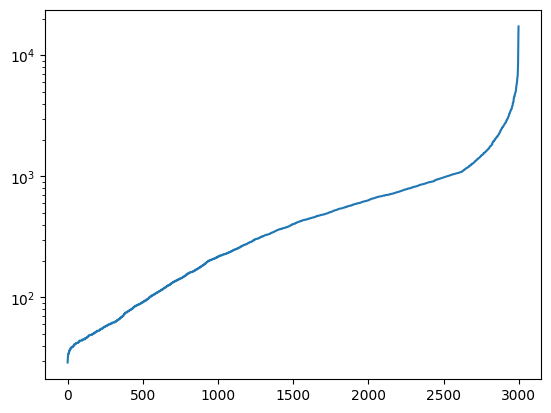

In [61]:
model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

fig,ax = plt.subplots()
ax.plot(
    sorted([len(model.tokenizer(x)['input_ids']) for x in _DOCS.sample(3000).text.tolist()])
)
ax.set_yscale('log')

In [30]:
a = results.loc[2500].join(_DOCS)
a.text.tolist()[0]
import difflib
matcher = difflib.SequenceMatcher(a=a.text.tolist()[0], b=a.text.tolist()[1])

from IPython.display import HTML
HTML(
difflib.HtmlDiff().make_table(
    a.text.tolist()[0].split(" "),
    a.text.tolist()[1].split(" "),
))

f,1,Retirement,f,1,Retirement
,2,is,,2,is
,3,grand.,,3,grand.
,4,especially,,4,especially
,5,when,,5,when
,6,you,,6,you
,7,can,,7,can
,8,retire,,8,retire
,9,at,,9,at
,10,age,,10,age
,11,35.,,11,35.


<Axes: >

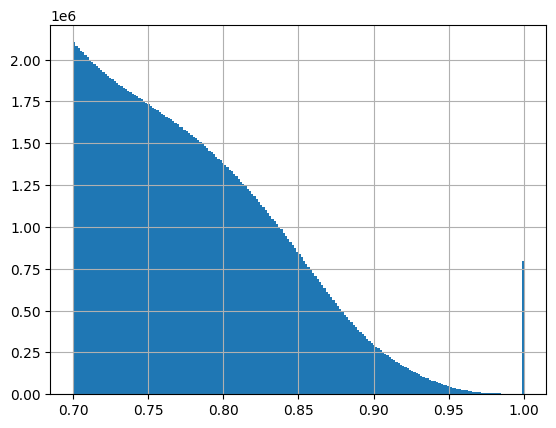

In [15]:
results.score.hist(bins=200)